# Data Cleaning

In [1]:
# import sys
# !{sys.executable} -m pip install -U pip
# !{sys.executable} -m pip install -U codeium-jupyter

In [170]:
import pandas as pd
from pathlib import Path
from pprint import pprint

In [1]:
train_data_path = "../data/train.csv"
test_data_path = "../data/test.csv"

In [172]:
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [173]:
pprint(train_df.shape)
train_df.head()

(93686, 3)


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [174]:
pprint(test_df.shape)
test_df.head()

(31229, 3)


,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...


## EDA

In [175]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [176]:
train_df.describe()

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


### Key Insights from the cybercrime train dataset
1. Dataset Size & Structure:
   - Total records: 93,686 cases
   - 3 columns: category, sub_category, crimeadditionalinfo
   - Memory usage: 2.1+ MB

2. Data Completeness:
   - category: All records present (93,686)
   - sub_category: 6,591 missing entries (93,686 - 87,095)
   - crimeadditionalinfo: Only 21 missing entries (93,686 - 93,665)

3. Categorical Distribution:
   - Main categories: 15 unique types
   - Sub-categories: 35 unique types
   - Most frequent:
     * Main category: Online Financial Fraud (57,434 cases, ~61%)
     * Sub-category: UPI Related Frauds (26,856 cases, ~31%)

4. Additional Information Analysis:
   - 85,013 unique descriptions out of 93,665 entries
   - Indicates ~8,652 duplicate descriptions
   - Most common description appears 2,342 times

This suggests a well-structured dataset with high completeness, strong focus on financial crimes, and standardized description patterns for similar cases. The missing sub-category entries might need investigation for data quality improvement.

In [177]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [178]:
test_df.describe()

,category,sub_category,crimeaditionalinfo
count,31229,28993,31222
unique,15,37,28785
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,18896,8890,753


### Key Insights from the cybercrime test dataset

1. Dataset Size & Structure:
   - Total records: 31,229 cases (roughly 1/3 of training set)
   - 3 columns: same structure as training data
   - Memory usage: 732.1+ KB

2. Data Completeness:
   - category: All records present (31,229)
   - sub_category: 2,236 missing entries (31,229 - 28,993)
   - crimeadditionalinfo: Only 7 missing entries (31,229 - 31,222)

3. Categorical Distribution:
   - Main categories: 15 unique types (same as training)
   - Sub-categories: 37 unique types (2 more than training)
   - Most frequent:
     * Main category: Online Financial Fraud (18,896 cases, ~60.5%)
     * Sub-category: UPI Related Frauds (8,890 cases, ~28.5%)

4. Additional Information Analysis:
   - 28,785 unique descriptions out of 31,222 entries
   - Indicates ~2,437 duplicate descriptions
   - Most common description appears 753 times

Key Comparisons to Training Data:
- Maintains similar proportions of financial fraud cases
- Similar data completeness patterns
- Slightly higher proportion of unique descriptions
- Smaller but representative sample of the main dataset

In [179]:
print("#"*20,"PERCENTAGE-WISE","#"*20,"\n")
pprint(train_df["category"].value_counts(normalize=True) * 100)

#################### PERCENTAGE-WISE #################### 

category
Online Financial Fraud                                  61.304784
Online and Social Media Related Crime                   12.958179
Any Other Cyber Crime                                   11.611127
Cyber Attack/ Dependent Crimes                           3.851162
RapeGang Rape RGRSexually Abusive Content                3.012190
Sexually Obscene material                                1.961873
Hacking  Damage to computercomputer system etc           1.825246
Sexually Explicit Act                                    1.656598
Cryptocurrency Crime                                     0.512350
Online Gambling  Betting                                 0.473924
Child Pornography CPChild Sexual Abuse Material CSAM     0.404543
Online Cyber Trafficking                                 0.195333
Cyber Terrorism                                          0.171851
Ransomware                                               0.059774
Report 

In [180]:
print("\n","#"*20,"NUMERICAL-WISE","#"*20,"\n")
pprint(train_df["sub_category"].value_counts(normalize=True) * 100)


 #################### NUMERICAL-WISE #################### 

sub_category
UPI Related Frauds                                                      30.835295
Other                                                                   12.489810
DebitCredit Card FraudSim Swap Fraud                                    12.405993
Internet Banking Related Fraud                                          10.186578
Fraud CallVishing                                                        6.662839
Cyber Bullying  Stalking  Sexting                                        4.694873
EWallet Related Fraud                                                    4.646650
FakeImpersonating Profile                                                2.639646
Profile Hacking Identity Theft                                           2.380160
Cheating by Impersonation                                                2.282565
Unauthorised AccessData Breach                                           1.279063
Online Job Fraud        

In [181]:
print("#"*20,"PERCENTAGE-WISE","#"*20,"\n")
pprint(train_df["category"].value_counts(normalize=True) * 100)
print("\n","#"*20,"NUMERICAL-WISE","#"*20,"\n")
pprint(train_df["category"].value_counts(normalize=True) * 100)

#################### PERCENTAGE-WISE #################### 

category
Online Financial Fraud                                  61.304784
Online and Social Media Related Crime                   12.958179
Any Other Cyber Crime                                   11.611127
Cyber Attack/ Dependent Crimes                           3.851162
RapeGang Rape RGRSexually Abusive Content                3.012190
Sexually Obscene material                                1.961873
Hacking  Damage to computercomputer system etc           1.825246
Sexually Explicit Act                                    1.656598
Cryptocurrency Crime                                     0.512350
Online Gambling  Betting                                 0.473924
Child Pornography CPChild Sexual Abuse Material CSAM     0.404543
Online Cyber Trafficking                                 0.195333
Cyber Terrorism                                          0.171851
Ransomware                                               0.059774
Report 

In [182]:
print("#"*20,"PERCENTAGE-WISE","#"*20,"\n")
pprint(test_df["sub_category"].value_counts(normalize=True) * 100)
print("\n","#"*20,"NUMERICAL-WISE","#"*20,"\n")
pprint(test_df["sub_category"].value_counts(normalize=True))

#################### PERCENTAGE-WISE #################### 

sub_category
UPI Related Frauds                                                      30.662574
Other                                                                   12.658228
DebitCredit Card FraudSim Swap Fraud                                    12.265029
Internet Banking Related Fraud                                          10.254199
Fraud CallVishing                                                        6.301521
Cyber Bullying  Stalking  Sexting                                        4.711482
EWallet Related Fraud                                                    4.614907
FakeImpersonating Profile                                                2.631670
Profile Hacking Identity Theft                                           2.590280
Cheating by Impersonation                                                2.479909
Unauthorised AccessData Breach                                           1.276170
Online Job Fraud         

## Check Null Values

In [183]:
train_df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

In [184]:
null_rows = train_df[train_df.isnull().any(axis=1)]
null_rows

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,NaN,I got the message on Whatsapp to my number The...
25,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
39,Sexually Explicit Act,NaN,httpswwwxnxxtvvideousapbfuckkkarrr\r\n\r\n Abo...
45,Sexually Obscene material,NaN,Many fake accounts are created and Im sufferin...
49,Sexually Explicit Act,NaN,SirMaam \r\nThis is my third report on this re...
...,...,...,...
93632,Sexually Explicit Act,NaN,ob cash ...
93648,Sexually Explicit Act,NaN,I got fraud by atm exchange in union bank of i...
93653,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
93667,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...


In [185]:
train_df.dropna(inplace=True)

In [186]:
train_df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [187]:
train_df[train_df.duplicated()].sort_values(by=["crimeaditionalinfo", "sub_category", "category"])

,category,sub_category,crimeaditionalinfo
58044,Online Financial Fraud,UPI Related Frauds,\tupi fraud
74976,Online Financial Fraud,UPI Related Frauds,\tupi fraud
91912,Online Financial Fraud,UPI Related Frauds,\tupi fraud
75905,Online Financial Fraud,UPI Related Frauds,\r\n\r\n Dear sir\r\n Please stop the ...
75567,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
...,...,...,...
46246,Online Financial Fraud,UPI Related Frauds,upi fraud total amount
58500,Online Financial Fraud,UPI Related Frauds,upi related fraud
8812,Online Financial Fraud,UPI Related Frauds,upi transactions
10562,Online Financial Fraud,UPI Related Frauds,upi transactions


In [188]:
train_df.loc[224]

category                                         Online Financial Fraud
sub_category                                         UPI Related Frauds
crimeaditionalinfo    Dear sir\r\n        Please stop the fraudulent...
Name: 224, dtype: object

In [189]:
train_df.loc[399]

category                                         Online Financial Fraud
sub_category                                         UPI Related Frauds
crimeaditionalinfo    Dear sir\r\n        Please stop the fraudulent...
Name: 399, dtype: object

In [190]:
train_df.drop_duplicates(inplace=True)

In [191]:
train_df[train_df.duplicated()]

,category,sub_category,crimeaditionalinfo


In [192]:
train_df["Words per CrimeAditionalInfo"] = train_df["crimeaditionalinfo"].str.split().apply(len)
train_df.head()

,category,sub_category,crimeaditionalinfo,Words per CrimeAditionalInfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,46
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,45
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,40
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,98
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,37


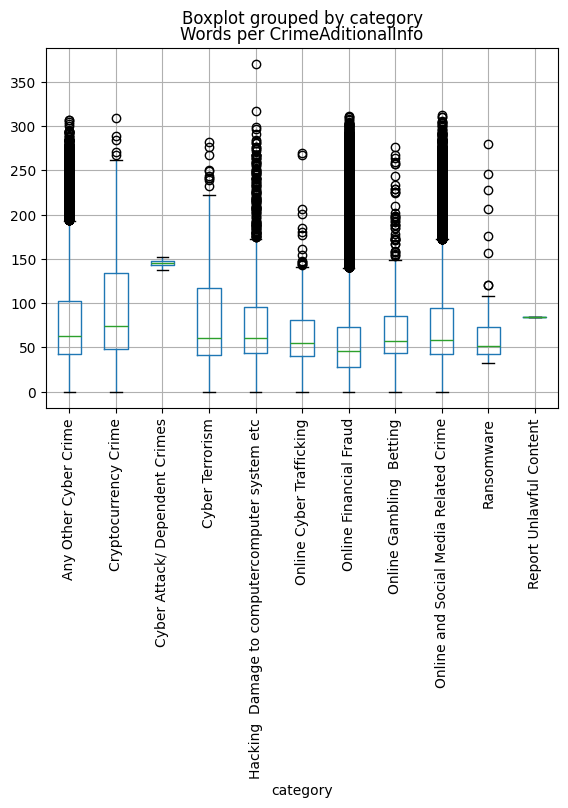

In [193]:
import matplotlib
import matplotlib.pyplot as plt
train_df.boxplot(column="Words per CrimeAditionalInfo", by="category")
plt.xticks(rotation=90)
plt.show()

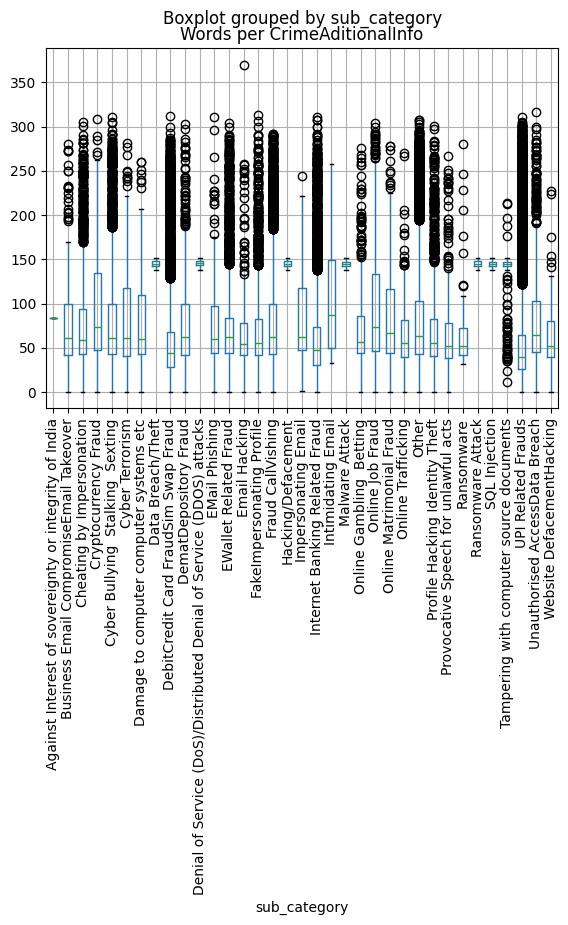

In [194]:
import matplotlib
import matplotlib.pyplot as plt
train_df.boxplot(column="Words per CrimeAditionalInfo", by="sub_category")
plt.xticks(rotation=90)
plt.show()

In [195]:
len(train_df.loc[0, "crimeaditionalinfo"].split())

46

In [196]:
test_df.isnull().sum()

category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

In [197]:
test_df[test_df.isnull().any(axis=1)]

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
10,Sexually Explicit Act,NaN,Hello sir they are sending friend request and ...
12,Sexually Obscene material,NaN,He was called from Maharashtra and created fak...
25,Child Pornography CPChild Sexual Abuse Materia...,NaN,The above mentioned porn site contains some vi...
61,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
...,...,...,...
31156,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
31182,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
31183,Sexually Explicit Act,NaN,Sir I have lost nearly for a mistake I have m...
31191,Sexually Explicit Act,NaN,Im from chalakudy this is a complaint about m...


In [198]:
test_df.dropna(inplace=True)

In [199]:
test_df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [200]:
test_df[test_df.duplicated()].sort_values(by=["crimeaditionalinfo", "sub_category", "category"])

,category,sub_category,crimeaditionalinfo
18052,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
19826,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
25792,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
12555,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
13606,Online Financial Fraud,UPI Related Frauds,\r\n Dear sir\r\n Please stop the frau...
...,...,...,...
5767,Online Financial Fraud,UPI Related Frauds,upi fraud total amount
17505,Online Financial Fraud,UPI Related Frauds,upi fraud total amount
19268,Online Financial Fraud,UPI Related Frauds,upi fraud total amount
22245,Online Financial Fraud,UPI Related Frauds,upi fraud total amount


In [201]:
import tiktoken
from tiktoken import Encoding
from pandas import DataFrame


def calculate_number_of_tokens_from_row(text: str, model_name: str) -> int:
    encoding: Encoding = tiktoken.encoding_for_model(model_name=model_name)
    token_count: int = len(encoding.encode(text=text))
    return token_count


def calculate_number_of_tokens_from_df(df: DataFrame, col:str, model_name: str) -> int:
    token_count: int = (
        df[col]
        .apply(
            func=lambda x: calculate_number_of_tokens_from_row(
                text=x, model_name=model_name
            )
        )
        .sum()
    )
    return token_count

In [202]:
train_df.shape

(82018, 4)

In [203]:
model_name = "gpt-4o-mini-2024-07-18"
total_tokens: int = calculate_number_of_tokens_from_df(df=train_df, col="crimeaditionalinfo", model_name=model_name)
total_tokens

np.int64(7187315)

In [204]:
model_name = "gpt-4o-mini-2024-07-18"
total_tokens: int = calculate_number_of_tokens_from_df(df=test_df, col="crimeaditionalinfo", model_name=model_name)
total_tokens

np.int64(2428813)

In [205]:
test_df.shape

(28987, 3)

In [206]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82018 entries, 0 to 93685
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   category                      82018 non-null  object
 1   sub_category                  82018 non-null  object
 2   crimeaditionalinfo            82018 non-null  object
 3   Words per CrimeAditionalInfo  82018 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [207]:
train_df["category"].value_counts(normalize=True, ascending=False) * 100

category
Online Financial Fraud                            64.005462
Online and Social Media Related Crime             14.723597
Any Other Cyber Crime                             13.181253
Cyber Attack/ Dependent Crimes                     4.399034
Hacking  Damage to computercomputer system etc     2.083689
Cryptocurrency Crime                               0.576703
Online Gambling  Betting                           0.541345
Online Cyber Trafficking                           0.223122
Cyber Terrorism                                    0.196298
Ransomware                                         0.068278
Report Unlawful Content                            0.001219
Name: proportion, dtype: float64

In [208]:
train_df["category"].unique()

array(['Online and Social Media Related Crime', 'Online Financial Fraud',
       'Online Gambling  Betting', 'Any Other Cyber Crime',
       'Cyber Attack/ Dependent Crimes', 'Cryptocurrency Crime',
       'Hacking  Damage to computercomputer system etc',
       'Cyber Terrorism', 'Online Cyber Trafficking', 'Ransomware',
       'Report Unlawful Content'], dtype=object)

In [209]:
train_df["sub_category"].unique()

array(['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing',
       'Online Gambling  Betting', 'Online Job Fraud',
       'UPI Related Frauds', 'Internet Banking Related Fraud', 'Other',
       'Profile Hacking Identity Theft',
       'DebitCredit Card FraudSim Swap Fraud', 'EWallet Related Fraud',
       'Data Breach/Theft', 'Cheating by Impersonation',
       'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'FakeImpersonating Profile', 'Cryptocurrency Fraud',
       'Malware Attack', 'Business Email CompromiseEmail Takeover',
       'Email Hacking', 'Hacking/Defacement',
       'Unauthorised AccessData Breach', 'SQL Injection',
       'Provocative Speech for unlawful acts', 'Ransomware Attack',
       'Cyber Terrorism', 'Tampering with computer source documents',
       'DematDepository Fraud', 'Online Trafficking',
       'Online Matrimonial Fraud', 'Website DefacementHacking',
       'Damage to computer computer systems etc', 'Impersonating Email'

In [210]:
train_df["sub_category"].value_counts(normalize=True, ascending=False) * 100

sub_category
UPI Related Frauds                                                      28.683947
Other                                                                   13.181253
DebitCredit Card FraudSim Swap Fraud                                    12.246092
Internet Banking Related Fraud                                           9.871004
Fraud CallVishing                                                        7.047234
Cyber Bullying  Stalking  Sexting                                        4.939160
EWallet Related Fraud                                                    4.886732
FakeImpersonating Profile                                                2.790851
Profile Hacking Identity Theft                                           2.523836
Cheating by Impersonation                                                2.414104
Unauthorised AccessData Breach                                           1.357019
Online Job Fraud                                                         1.110732
Dem

In [211]:
train_df.shape
train_df.head()

,category,sub_category,crimeaditionalinfo,Words per CrimeAditionalInfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,46
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,45
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,40
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,98
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,37


In [212]:
train_df

,category,sub_category,crimeaditionalinfo,Words per CrimeAditionalInfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,46
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,45
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,40
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,98
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,37
...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,42
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,34
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,33
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,48


In [213]:
# from pandas.core.frame import DataFrame

# category: DataFrame = train_df[["category", "crimeaditionalinfo"]]
# category.to_csv(path_or_buf="category_train.csv", index=False)

# subcategory: DataFrame = train_df[["sub_category", "crimeaditionalinfo"]]
# subcategory.to_csv(path_or_buf="subcategory_train.csv", index=False)

In [214]:
test_df

,category,sub_category,crimeaditionalinfo
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
5,Online Financial Fraud,Internet Banking Related Fraud,My salary of amount has to be credited to my ...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [215]:
# category_test: DataFrame = test_df[["category", "crimeaditionalinfo"]] 
# category_test.to_csv(path_or_buf="category_test.csv", index=False)

# subcategory_test: DataFrame = test_df[["sub_category", "crimeaditionalinfo"]] 
# subcategory_test.to_csv(path_or_buf="subcategory_test.csv", index=False)

In [216]:
# pd.read_csv("./subcategory_test.csv")

## Group Categories

In [217]:
# Create a mapping dictionary to group the categories
category_mapping: dict[str, str] = {
    'Online and Social Media Related Crime': 'Women/Child Related Crime',
    'Online Financial Fraud': 'Financial Fraud Crimes',
    'Online Gambling  Betting': 'Other Cyber Crime',
    'Any Other Cyber Crime': 'Other Cyber Crime', 
    'Cyber Attack/ Dependent Crimes': 'Other Cyber Crime',
    'Cryptocurrency Crime': 'Other Cyber Crime',
    'Hacking  Damage to computercomputer system etc': 'Other Cyber Crime',
    'Cyber Terrorism': 'Other Cyber Crime',
    'Online Cyber Trafficking': 'Women/Child Related Crime',
    'Ransomware': 'Other Cyber Crime',
    'Report Unlawful Content': 'Women/Child Related Crime'
}

# Apply the mapping to the 'category' column
train_df['category'] = train_df['category'].map(arg=category_mapping)

In [218]:
train_df.category.value_counts(normalize=True, ascending=False)

category
Financial Fraud Crimes       0.640055
Other Cyber Crime            0.210466
Women/Child Related Crime    0.149479
Name: proportion, dtype: float64

In [219]:
train_df.shape

(82018, 4)

In [220]:
test_df['category'] = test_df['category'].map(arg=category_mapping)
test_df.category.value_counts(normalize=True, ascending=False)

category
Financial Fraud Crimes       0.651761
Other Cyber Crime            0.203326
Women/Child Related Crime    0.144913
Name: proportion, dtype: float64

In [221]:
test_df.shape

(28987, 3)

In [222]:
test_df.isnull().sum()

category              4
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [224]:
test_df.dropna(inplace=True)

In [225]:
train_df[["category", "crimeaditionalinfo"]].to_csv(path_or_buf="category_train.csv", index=False)
test_df[["category", "crimeaditionalinfo"]].to_csv(path_or_buf="category_test.csv", index=False)

In [ ]:
from pandas.core.frame import DataFrame

category: DataFrame = train_df[["category", "crimeaditionalinfo"]]
category.to_csv(path_or_buf="category_train.csv", index=False)

subcategory: DataFrame = train_df[["sub_category", "crimeaditionalinfo"]]
subcategory.to_csv(path_or_buf="subcategory_train.csv", index=False)

,category,sub_category,crimeaditionalinfo,Words per CrimeAditionalInfo
0,Women/Child Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,46
1,Financial Fraud Crimes,Fraud CallVishing,The above fraudster is continuously messaging ...,45
2,Other Cyber Crime,Online Gambling Betting,He is acting like a police and demanding for m...,40
3,Women/Child Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,98
4,Financial Fraud Crimes,Fraud CallVishing,I received a call from lady stating that she w...,37
...,...,...,...,...
93681,Financial Fraud Crimes,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,42
93682,Financial Fraud Crimes,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,34
93683,Financial Fraud Crimes,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,33
93684,Women/Child Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,48


category              0
crimeaditionalinfo    0
dtype: int64

In [ ]:
# # Create a mapping dictionary to group the sub-categories
# sub_category_mapping: dict[str, str] = {
#     'Rape/Gang Rape-Sexually Abusive Content': 'Women/Child Related Crime',
#     'Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material': 'Women/Child Related Crime',
#     'Debit/Credit Card Fraud': 'Financial Fraud Crimes',
#     'SIM Swap Fraud': 'Financial Fraud Crimes', 
#     'Internet Banking-Related Fraud': 'Financial Fraud Crimes',
#     'Business Email Compromise/Email Takeover': 'Financial Fraud Crimes',
#     'E-Wallet Related Frauds': 'Financial Fraud Crimes',
#     'Fraud Call/Vishing': 'Financial Fraud Crimes',
#     'Demat/Depository Fraud': 'Financial Fraud Crimes',
#     'UPI-Related Frauds': 'Financial Fraud Crimes',
#     'Aadhaar Enabled Payment System (AEPS) Fraud': 'Financial Fraud Crimes',
#     'Email Phishing': 'Other Cyber Crime',
#     'Cheating by Impersonation': 'Other Cyber Crime',
#     'Fake/Impersonating Profile': 'Other Cyber Crime',
#     'Profile Hacking/Identity Theft': 'Other Cyber Crime',
#     'Provocative Speech of Unlawful Acts': 'Other Cyber Crime',
#     'Impersonating Email': 'Other Cyber Crime',
#     'Intimidating Email': 'Other Cyber Crime',
#     'Online Job Fraud': 'Other Cyber Crime',
#     'Online Matrimonial Fraud': 'Other Cyber Crime',
#     'Cyber Bullying/Stalking/Sexting': 'Women/Child Related Crime',
#     'Email Hacking': 'Other Cyber Crime',
#     'Damage to Computer Systems': 'Other Cyber Crime',
#     'Tampering with Computer Source Documents': 'Other Cyber Crime',
#     'Defacement/Hacking': 'Other Cyber Crime',
#     'Unauthorized Access/Data Breach': 'Other Cyber Crime',
#     'Online Cyber Trafficking': 'Women/Child Related Crime',
#     'Online Gambling/Betting Fraud': 'Other Cyber Crime',
#     'Ransomware': 'Other Cyber Crime',
#     'Cryptocurrency Crime': 'Other Cyber Crime',
#     'Cyber Terrorism': 'Other Cyber Crime',
#     'Any Other Cyber Crime': 'Other Cyber Crime',
#     'Targeted scanning/probing of critical networks/systems': 'Other Cyber Crime',
#     'Compromise of critical systems/information': 'Other Cyber Crime',
#     'Unauthorised access to IT systems/data': 'Other Cyber Crime',
#     'Defacement of websites or unauthorized changes, such as inserting malicious code or external links': 'Other Cyber Crime',
#     'Malicious code attacks (e.g., virus, worm, Trojan, Bots, Spyware, Ransomware, Crypto miners)': 'Other Cyber Crime',
#     'Attacks on servers (Database, Mail, DNS) and network devices (Routers)': 'Other Cyber Crime',
#     'Identity theft, spoofing, and phishing attacks': 'Other Cyber Crime',
#     'Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks': 'Other Cyber Crime'
# }

# # Apply the mapping to the 'sub_category' column
# train_df['sub_category'] = train_df['sub_category'].map(sub_category_mapping)

In [169]:
train_df["sub_category"].value_counts()

sub_category
Other Cyber Crime    3662
Name: count, dtype: int64

In [111]:
# Create a new 'classification' column that combines category and sub-category
train_df['classification'] = train_df['category'] + ' - ' + train_df['sub_category']

# Print the unique classification values
print(train_df['classification'].unique())

[nan]


In [226]:
train_df.head()

,category,sub_category,crimeaditionalinfo,Words per CrimeAditionalInfo
0,Women/Child Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,46
1,Financial Fraud Crimes,Fraud CallVishing,The above fraudster is continuously messaging ...,45
2,Other Cyber Crime,Online Gambling Betting,He is acting like a police and demanding for m...,40
3,Women/Child Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,98
4,Financial Fraud Crimes,Fraud CallVishing,I received a call from lady stating that she w...,37


In [227]:
train_df["category"].value_counts()

category
Financial Fraud Crimes       52496
Other Cyber Crime            17262
Women/Child Related Crime    12260
Name: count, dtype: int64

In [228]:
train_df["sub_category"].value_counts()

sub_category
UPI Related Frauds                                                      23526
Other                                                                   10811
DebitCredit Card FraudSim Swap Fraud                                    10044
Internet Banking Related Fraud                                           8096
Fraud CallVishing                                                        5780
Cyber Bullying  Stalking  Sexting                                        4051
EWallet Related Fraud                                                    4008
FakeImpersonating Profile                                                2289
Profile Hacking Identity Theft                                           2070
Cheating by Impersonation                                                1980
Unauthorised AccessData Breach                                           1113
Online Job Fraud                                                          911
DematDepository Fraud                              

In [230]:
test_df["category"].value_counts()

category
Financial Fraud Crimes       18890
Other Cyber Crime             5893
Women/Child Related Crime     4200
Name: count, dtype: int64

In [231]:
test_df["sub_category"].value_counts()

sub_category
UPI Related Frauds                                                      8886
Other                                                                   3670
DebitCredit Card FraudSim Swap Fraud                                    3555
Internet Banking Related Fraud                                          2973
Fraud CallVishing                                                       1826
Cyber Bullying  Stalking  Sexting                                       1366
EWallet Related Fraud                                                   1338
FakeImpersonating Profile                                                763
Profile Hacking Identity Theft                                           751
Cheating by Impersonation                                                719
Unauthorised AccessData Breach                                           370
Online Job Fraud                                                         294
DematDepository Fraud                                          

In [232]:
train_df.to_csv("train_clean.csv", index=False)
test_df.to_csv("test_clean.csv", index=False)

In [237]:
train_df["sub_category"].value_counts()[:25]

sub_category
UPI Related Frauds                                                      23526
Other                                                                   10811
DebitCredit Card FraudSim Swap Fraud                                    10044
Internet Banking Related Fraud                                           8096
Fraud CallVishing                                                        5780
Cyber Bullying  Stalking  Sexting                                        4051
EWallet Related Fraud                                                    4008
FakeImpersonating Profile                                                2289
Profile Hacking Identity Theft                                           2070
Cheating by Impersonation                                                1980
Unauthorised AccessData Breach                                           1113
Online Job Fraud                                                          911
DematDepository Fraud                              

In [238]:
train_df["sub_category"].value_counts()[25:]

sub_category
Online Trafficking                                       183
Cyber Terrorism                                          161
EMail Phishing                                           157
Online Matrimonial Fraud                                 132
Damage to computer computer systems etc                  108
Website DefacementHacking                                 89
Ransomware                                                56
Impersonating Email                                       44
Intimidating Email                                        29
Against Interest of sovereignty or integrity of India      1
Name: count, dtype: int64

In [ ]:
# # Implementing the merging logic in the DataFrame
# # Define a mapping dictionary to merge the lower count categories into higher count ones
# merge_mapping = {
#     'Online Trafficking': 'Online Job Fraud',
#     'Cyber Terrorism': 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
#     'EMail Phishing': 'Fraud CallVishing',
#     'Online Matrimonial Fraud': 'Cheating by Impersonation',
#     'Damage to computer computer systems etc': 'Tampering with computer source documents',
#     'Website DefacementHacking': 'Hacking/Defacement',
#     'Ransomware': 'Ransomware Attack',
#     'Impersonating Email': 'Email Hacking',
#     'Intimidating Email': 'Email Hacking',
#     'Against Interest of sovereignty or integrity of India': 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
# }

# # Apply the mapping to merge categories
# train_df['sub_category'] = train_df['sub_category'].replace(merge_mapping)

# # Re-compute the value counts after merging
# merged_value_counts = train_df['sub_category'].value_counts()




In [241]:
merged_value_counts

sub_category
UPI Related Frauds                                                      23526
Other                                                                   10811
DebitCredit Card FraudSim Swap Fraud                                    10044
Internet Banking Related Fraud                                           8096
Fraud CallVishing                                                        5937
Cyber Bullying  Stalking  Sexting                                        4051
EWallet Related Fraud                                                    4008
FakeImpersonating Profile                                                2289
Cheating by Impersonation                                                2112
Profile Hacking Identity Theft                                           2070
Unauthorised AccessData Breach                                           1113
Online Job Fraud                                                         1094
DematDepository Fraud                              

In [242]:
# Updating the merging logic to combine all classes with counts less than 1000 into those with counts >= 1000
# Re-defining the mapping dictionary with the new criteria

# Define categories with counts >= 1000
high_count_categories = {
    'UPI Related Frauds': 23526,
    'Other': 10811,
    'DebitCredit Card FraudSim Swap Fraud': 10044,
    'Internet Banking Related Fraud': 8096,
    'Fraud CallVishing': 5780,
    'Cyber Bullying Stalking Sexting': 4051,
    'EWallet Related Fraud': 4008,
    'FakeImpersonating Profile': 2289,
    'Profile Hacking Identity Theft': 2070,
    'Cheating by Impersonation': 1980,
    'Unauthorised AccessData Breach': 1113
}

# Defining the revised merging logic for subcategories with counts < 1000
merge_mapping_revised = {
    # Merging similar themes with higher count categories
    'Online Job Fraud': 'Unauthorised AccessData Breach',
    'DematDepository Fraud': 'FakeImpersonating Profile',
    'Tampering with computer source documents': 'Cheating by Impersonation',
    'Hacking/Defacement': 'Profile Hacking Identity Theft',
    'Ransomware Attack': 'Fraud CallVishing',
    'Malware Attack': 'Cyber Bullying Stalking Sexting',
    'SQL Injection': 'Internet Banking Related Fraud',
    'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks': 'Internet Banking Related Fraud',
    'Data Breach/Theft': 'Unauthorised AccessData Breach',
    'Cryptocurrency Fraud': 'DebitCredit Card FraudSim Swap Fraud',
    'Online Gambling Betting': 'EWallet Related Fraud',
    'Provocative Speech for unlawful acts': 'Cyber Bullying Stalking Sexting',
    'Email Hacking': 'Fraud CallVishing',
    'Business Email CompromiseEmail Takeover': 'Fraud CallVishing',
    'Online Trafficking': 'Unauthorised AccessData Breach',
    'Cyber Terrorism': 'Profile Hacking Identity Theft',
    'EMail Phishing': 'Fraud CallVishing',
    'Online Matrimonial Fraud': 'Cheating by Impersonation',
    'Damage to computer computer systems etc': 'Tampering with computer source documents',
    'Website DefacementHacking': 'Hacking/Defacement',
    'Ransomware': 'Fraud CallVishing',
    'Impersonating Email': 'Email Hacking',
    'Intimidating Email': 'Email Hacking',
    'Against Interest of sovereignty or integrity of India': 'Profile Hacking Identity Theft'
}

# Apply the revised mapping to merge categories
train_df['sub_category'] = train_df['sub_category'].replace(merge_mapping_revised)

# Re-compute the value counts after revised merging
revised_value_counts = train_df['sub_category'].value_counts()


In [243]:
revised_value_counts

sub_category
UPI Related Frauds                      23526
Other                                   10811
DebitCredit Card FraudSim Swap Fraud    10517
Internet Banking Related Fraud           9270
Fraud CallVishing                        7239
Cyber Bullying  Stalking  Sexting        4051
EWallet Related Fraud                    4008
FakeImpersonating Profile                3041
Cheating by Impersonation                2787
Profile Hacking Identity Theft           2699
Unauthorised AccessData Breach           2691
Cyber Bullying Stalking Sexting           934
Online Gambling  Betting                  444
Name: count, dtype: int64